# **Credit Card Customer Churn Analysis (EDA & Statistics)**

## Objectives – EDA & Statistics 

In this notebook, I will perform exploratory data analysis (EDA) and statistical evaluation of the processed Credit Card Customer Churn dataset. The goal is to test the hypotheses defined during the ETL phase, uncover patterns and insights in the data, and prepare visual and statistical outputs that will inform predictive modeling and dashboard development in Power BI.

This notebook focuses on:

* Investigating relationships between customer attributes and churn.
* Testing the hypotheses formulated in the ETL notebook using visualisations and descriptive statistics.
* Identifying trends, outliers, and potential correlations that can guide feature selection for machine learning.
* Generating plots and summary statistics suitable for both technical analysis and stakeholder presentation.

## Inputs

To run this notebook, the following inputs are required:

* Processed dataset CSV: The cleaned and transformed Credit Card Customer Churn dataset produced in the ETL notebook.
* Python libraries: Including but not limited to:
* pandas – for data manipulation and aggregation
* numpy – for numerical operations
* matplotlib and seaborn – for data visualisation
* scipy.stats – for statistical testing
* sklearn.preprocessing – for feature scaling and encoding (if needed for stats/ML)

## Outputs

This notebook will generate:

* Summary statistics: Descriptive metrics for numerical and categorical variables.
* Visualisations: Charts (bar, box, histogram, scatter, etc.) to explore the relationships between features and churn.
* Hypothesis test results: Statistical metrics or plots supporting/refuting each hypothesis.
* Feature insights: Identification of variables and patterns to inform predictive modeling and dashboard design.
* Exportable DataFrame: Optionally, a processed dataset with engineered features ready for ML or dashboard integration.


In [1]:
# Import all libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Test dataset by loading into a DataFrame
df = pd.read_csv("../data/cleaned_data/credit_churn_processed.csv") 

df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,5,1,3,12691.0,777,11914.0,1.335,...,False,False,False,True,False,False,False,False,False,False
1,0,49,5,6,1,2,8256.0,864,7392.0,1.541,...,True,False,False,False,False,True,False,False,False,False
2,0,51,3,4,1,0,3418.0,0,3418.0,2.594,...,False,False,False,False,True,False,False,False,False,False
3,0,40,4,3,4,1,3313.0,2517,796.0,1.405,...,False,True,False,False,False,True,False,False,False,False
4,0,40,3,5,1,0,4716.0,0,4716.0,2.175,...,False,False,False,True,False,False,False,False,False,False


### **Hypothesis #1** - Customers with shorter tenure are more likely to churn compared to customers with longer tenure.

C:\Users\T Shah\AppData\Local\Temp\ipykernel_4000\928834136.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn = df.groupby('Tenure_Bin')['Attrition_Flag'].mean().reset_index()
C:\Users\T Shah\AppData\Local\Temp\ipykernel_4000\928834136.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


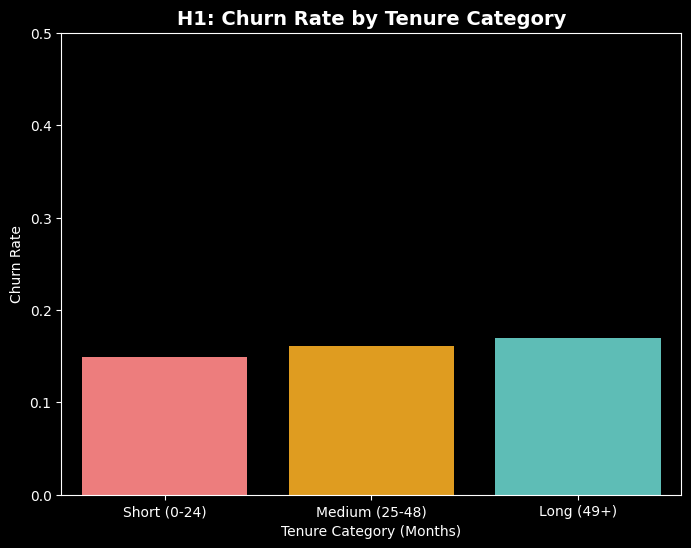

Tenure_Bin
Medium (25-48)    8625
Short (0-24)       847
Long (49+)         655
Name: count, dtype: int64

In [2]:
# ===============================
# H1: Churn Rate by Customer Tenure
# ===============================

plt.style.use('dark_background')

# Dynamic bin edges based on dataset
bin_edges = [0, 24, 48, df['Tenure_Months'].max() + 1]  # last edge = max + 1
bin_edges = sorted(list(set(bin_edges)))  # remove duplicates & ensure increasing

# Labels must match number of bins - 1
bin_labels = ['Short (0-24)', 'Medium (25-48)', 'Long (49+)'][:len(bin_edges)-1]

# Create tenure bins
df['Tenure_Bin'] = pd.cut(
    df['Tenure_Months'],
    bins=bin_edges,
    labels=bin_labels,
    include_lowest=True
)

# Compute churn rate per tenure bin
tenure_churn = df.groupby('Tenure_Bin')['Attrition_Flag'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8,6))
sns.barplot(
    x='Tenure_Bin',
    y='Attrition_Flag',
    data=tenure_churn,
    palette=['#FF6B6B', '#FFA500', '#4ECDC4'][:len(bin_edges)-1]
)
plt.ylabel("Churn Rate")
plt.xlabel("Tenure Category (Months)")
plt.title("H1: Churn Rate by Tenure Category", fontsize=14, fontweight='bold')
plt.ylim(0, 0.5)
plt.show()

df['Tenure_Bin'].value_counts()




### **Churn Rate by Customer Tenure**

I created a visual comparison of customer churn rates across different tenure categories.

* Short Tenure: Customers with 0–24 months on book
* Medium Tenure: Customers with 24–48 months on book
* Long Tenure: Customers with 48+ months on book

The bar chart shows the proportion of customers who churned within each tenure category.

Observations:

Churn slightly increases with tenure:

* Short: ~15%
* Medium: ~16%
* Long: ~17%

This is opposite to the initial hypothesis, which expected higher churn among short-tenure customers. The difference is small, indicating that tenure alone is not a strong predictor of churn. Other factors like credit utilization, total transactions, or income may have a more significant effect.

The chart helped me quickly visualize churn trends across tenure groups and highlighted that additional features should be investigated to better understand what drives customer attrition.

### **Hypothesis #2** - Customers with lower credit utilisation ratios are more likely to churn than customers with higher utilisation ratios.

C:\Users\T Shah\AppData\Local\Temp\ipykernel_4000\2307776513.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  util_churn = df.groupby('Credit_Util_Bin')['Churn_Flag_Num'].mean().reset_index()
C:\Users\T Shah\AppData\Local\Temp\ipykernel_4000\2307776513.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


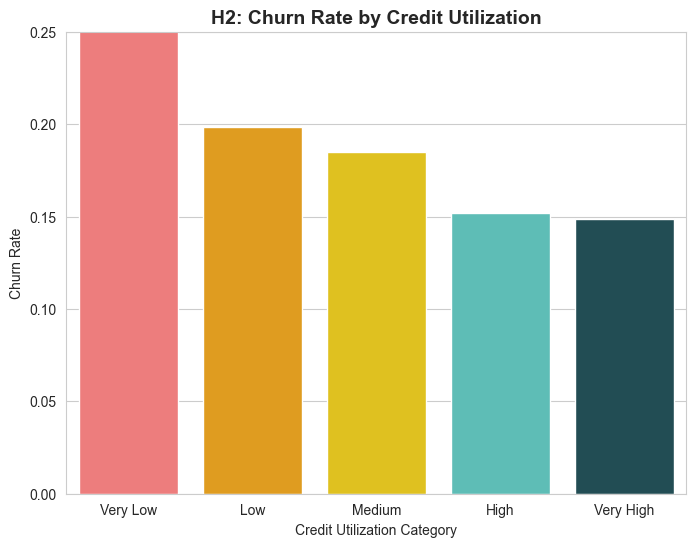

Credit_Util_Bin
Very High    5649
High         1972
Medium       1331
Low          1044
Very Low      131
Name: count, dtype: int64


In [23]:
# ===============================
# H2: Churn Rate by Credit Utilization
# ===============================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Light background style
sns.set_style("whitegrid")

# Ensure numeric churn flag
df['Churn_Flag_Num'] = df['Attrition_Flag'].astype(float)

# Create credit utilization bins dynamically
max_util = df['Credit_Utilization'].max()
bin_edges = [0, 0.05, 0.15, 0.3, 0.6, max_util + 0.01]  # adjust to ensure all data fits
bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

df['Credit_Util_Bin'] = pd.cut(
    df['Credit_Utilization'],
    bins=bin_edges,
    labels=bin_labels,
    include_lowest=True
)

# Compute churn rate per bin
util_churn = df.groupby('Credit_Util_Bin')['Churn_Flag_Num'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(8,6))
sns.barplot(
    x='Credit_Util_Bin',
    y='Churn_Flag_Num',
    data=util_churn,
    palette=['#FF6B6B','#FFA500','#FFD700','#4ECDC4','#1A535C']
)

plt.ylabel("Churn Rate")
plt.xlabel("Credit Utilization Category")
plt.title("H2: Churn Rate by Credit Utilization", fontsize=14, fontweight='bold')
plt.ylim(0, 0.25)  # optional, ensures differences are visible
plt.show()

# Display counts for verification
print(df['Credit_Util_Bin'].value_counts())


### **Churn Rate by Credit Utilization**

I created a bar chart to analyse how churn varies across different credit utilization categories.

* Very Low: 0–5% utilization
* Low: 5–15% utilization
* Medium: 15–30% utilization
* High: 30–60% utilization
* Very High: Above 60% utilization

The chart shows the average churn rate within each utilization group.

Observations:

* Very Low Utilization: Churn rate ≈ 25%
* Low Utilization: Churn rate ≈ 19.8%
* Medium Utilization: Churn rate ≈ 18.5%
* High Utilization: Churn rate ≈ 15.2%
* Very High Utilization: Churn rate ≈ 14.9%

Insights:

* Customers with very low credit utilization have the highest churn rate at 25%.
* Churn steadily decreases as utilization increases.
* Customers in the High and Very High utilization groups have the lowest churn rates (around 15%).
* There is a clear negative relationship between credit utilization and churn — higher engagement with credit correlates with lower churn.

Conclusion:

The visual supports the hypothesis that customers with lower credit utilization ratios are more likely to churn than customers with higher utilization ratios. This suggests that low credit usage may signal disengagement, making those customers strong candidates for targeted retention strategies.

### **Hypothesis #3** - Churn rates differ significantly across income categories.